# Divide and Conquer algorithms
In this notebook we will code and analyse the following three divide and conquer algorithms.

1. Counting the number of inversions
2. Matrix multiplication using Strassen's algorithm
3. Computing the closest points together.

## Counting Inversions
Counting the number of inversions is a measure of how similar (or not similar) are two arrays of numbers. This algorithm is used in recommender systems where the system recommends something (say a movie) to the consumer based on how similar their rating is to other people who rated similarly.

Collaborative Filtering is a technique where we try to find similarities between likes of people. Suppose we want to find similarities of the movie rankings of two people, we will sort movies by ranking of one person's preference and then put ranks given by the second person for those movies.

For example if your ranked 3 movies A, B and C as your favorite movies and your friend ranked their favorite movies as B A C then between you and the your friend the ranking list becomes 2 1 3 because A is your favorite movie but is second favorite for B. Similarly B is your second favorite movie but your friend's favorite. Both you and your friend's choice match for the third best movie.

From the above example we see that if two people have similar tastes, both the arrays would be identical and there would be no inversions. Higher the number of inversions more are the differences in the preferences.

We will use divide and conquer algorithm like Merge sort to find the number of inversions in an array. The number of inversions in an array A are the number of pairs of indices $(i, j)$ where $i < j$ and $A[i] < A[j]$

An array that is sorted has no inversions, the converse is also true, that is, an array with no inversions is sorted and is not sorted if it has atleast one inversion.

For example, consider the following array

1 3 5 2 4 6

The number of inversions in this array are the following pair of numbers (3, 2), (5, 2) and (5, 4)

For an array of n numbers, we can have a maxumum of (n - 1) + (n - 2) + .. + 1 number of inversions = $n(n - 1) / 2$ number of inversions.

Let us implement counting inversion in two different ways. First one is the Bruteforce approach and the second one is using divide and conquer approach that sorts the numbers using Merge Sort along with counting the number of inversions.



### Brute force approach for Counting Inversions

In [19]:
def count_inversions_brute_force(arr):
    count_inv = 0
    for i in range(len(arr)-1):
        for j in range(i+1, len(arr)):
            if arr[i] > arr[j]:
                count_inv +=1
    print(count_inv)

count_inversions_brute_force([1,2,3,4,5,6,7,8,9])
count_inversions_brute_force([1,2,3,6,5,4,7,8,9])
count_inversions_brute_force([6,5,4,3,2,1])
count_inversions_brute_force([1, 3, 5, 2, 4, 6])
count_inversions_brute_force([ 8, 7, 6, 5, 4, 3 ,2, 1 ])

0
3
15
3
28


we will now load the two test case files provided <a href=http://algorithmsilluminated.org/ > here</a> and test our implementation.

In [47]:
import urllib3
http = urllib3.PoolManager()

# Test case
r1 = http.request('GET', "http://algorithmsilluminated.org/datasets/problem3.5test.txt")
problem35teststr = r1.data.split('\r\n')
del problem35teststr[-1]
problem35test = [int(i) for i in problem35teststr]
count_inversions_brute_force(problem35test)

# Challenge data set
###  Brute force approach not work  efficiently on larger problems for counting the inversions.
#r2 = http.request('GET', "http://algorithmsilluminated.org/datasets/problem3.5.txt")
#problem35str = r2.data.split('\r\n')
#del problem35str[-1]
#problem35 = [int(i) for i in problem35str]
#count_inversions_brute_force(problem35)

28


### Divide and Conquer approach for Counting Inversions

The brute force approach seems to be working fine for small inputs, it will however not work for efficiently on the larger 100000 numbers for counting the inversions. We will now implement the inversion counting piggy backed on merge sort.

In [73]:
def sort_and_count_inversions(arr, count_inversions):
    n = len(arr)
    if n == 1:
        return arr, count_inversions

    if n >= 1:
        left_tree, count_inversions = sort_and_count_inversions(arr[ : n/2], count_inversions)   
        right_tree, count_inversions = sort_and_count_inversions(arr[n/2 : ], count_inversions)
        sorted_arr = [None] * n
        i = 0
        j = 0
        for k in range(n):
            if(i < len(left_tree) and j < len(right_tree)):
                if left_tree[i] <= right_tree[j]:
                    sorted_arr[k] = left_tree[i]
                    i+=1 
                elif left_tree[i] > right_tree[j]:
                    sorted_arr[k] = right_tree[j]
                    j+=1 
                    count_inversions += len(left_tree) - i
                
            elif i >= len(left_tree) and j < len(right_tree):
                sorted_arr[k] = right_tree[j]
                j += 1
            elif j >= len(right_tree) and i < len(left_tree):
                sorted_arr[k] = left_tree[i]
                i += 1
    
    return  sorted_arr, count_inversions
    

print(sort_and_count_inversions([4, 3, 2] , count_inversions = 0)[1])    
print(sort_and_count_inversions([4, 3, 2, 10, 12, 1, 5, 6, 24, 33, 23,54, 12, 6 ] , count_inversions = 0)[1])    
print(sort_and_count_inversions([1,2,3,4,5,6,7,8,9] , count_inversions = 0)[1])
print(sort_and_count_inversions([1,2,3,6,5,4,7,8,9] , count_inversions = 0)[1])
print(sort_and_count_inversions([6,5,4,3,2,1] , count_inversions = 0)[1])
print(sort_and_count_inversions([1, 3, 5, 2, 4, 6] , count_inversions = 0)[1])
print(sort_and_count_inversions([ 8, 7, 6, 5, 4, 3 ,2, 1 ] , count_inversions = 0)[1])

3
25
0
3
15
3
28


In [80]:
import urllib3
http = urllib3.PoolManager()

# Test case
r1 = http.request('GET', "http://algorithmsilluminated.org/datasets/problem3.5test.txt")
problem35teststr = r1.data.split('\r\n')
del problem35teststr[-1]
problem35test = [int(i) for i in problem35teststr]
print("Number of splits in test array are  {}".format(sort_and_count_inversions(problem35test , count_inversions = 0)[1]))

# Challenge data set
###**** Divide and Conquer approach works efficiently on larger problems for counting the inversions. ********************
r2 = http.request('GET', "http://algorithmsilluminated.org/datasets/problem3.5.txt")
problem35str = r2.data.split('\r\n')
del problem35str[-1]
problem35 = [int(i) for i in problem35str]
print("Number of splits in the challenge data set are  {}".format(sort_and_count_inversions(problem35 , count_inversions = 0)[1]))

Number of splits in test array are  28
Number of splits in the challenge data set are  2407905288


The divide and conquer method sort_and_count_inversions is trivial. All we do is to count the number of inversions on the left and right and get the corresponding halves sorted. We then find the split inversions and also merge the two sorted arrays. The total inversions are the number of inversions on the left plus the ones on the right plus the number of split inversions.

The ingenuity lies in the count_inversions_and_sort function. This function piggy backs on the merge sort function and counts the number of inversions along with sorting the array. The function defined above is pretty straight forward and has comments inline giving explanation.

If we have no inversions in a array A and we receive two halves of an array, then the elements in first half are strictly less than the elements in second half.

The sort_and_count_inversions splits the input array in two and recursively sorts and counts inversions on the left and right half. The number of tasks at level n doubles than that of level n - 1 and input size given to each of task at level n is half of the input given to a unit on n - 1 level. This is similar to merge sort and given that the routine to sort and count inversions execute in linear time, the count sort_and_count_inversions also runs in $O(nlogn)$ time

***

#### Strassen's Matrix multiplication Algorithm
Stratten's Matrix multiplication algorithm is a clever divide and conquer approach for multiplying two matrix. Before we see the details of matrix multiplication using Strassen's approach, let us implement matrix multiplication using simple, straight forward approach.

For simplicity of implementing divide and conquer algorithms, we will assume that the matrix square and each side is a power of 2.

In [89]:
def matmul_simple(A, B):
    dim = len(A[0])
    Z = [[0 for _ in range(dim)] for _ in range(dim)]
    for i in range(dim):
        for j in range(dim):
            Z[i][j] = sum(A[i][k] * B[k][j] for k in range(dim))
    return Z

In [90]:

matmul_simple([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16]], 
                  [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16]])

[[90, 100, 110, 120],
 [202, 228, 254, 280],
 [314, 356, 398, 440],
 [426, 484, 542, 600]]

Since there are three loops in the above multiplication (with variables i, j and k for each loop counter). The time complexity of a matrix multiplication is $O(n^3)$.

Before we go ahead and implement a recursive divide and conquer algorithm, let us verify our result are correct by using a reference implementation.

In [88]:
import numpy as np
A = np.matrix([[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16]])
A * A

matrix([[ 90, 100, 110, 120],
        [202, 228, 254, 280],
        [314, 356, 398, 440],
        [426, 484, 542, 600]])

The divide and conquer approach will break split an $n \times n$ matrix into 4 $\frac{n}{2} \times \frac{n}{2}$ matrix and then multiple then recursively. Let us illustrate then as below

Suppose the bigger matrix X and Y are split in the following two matrices. Then the resulting matrix multiplication is formed by multiplying and these 8 small matrices. This divide and conquer can continue until we get a matrix of size 1 where the recursive divide and conquer stops. This divide and conquer is summarized in the following picture where A, B, C, D and E, F, G, H are smaller matrices of the bigger matrices X and Y respectively.

$$
\begin{pmatrix} 
A & B \\
C & D 
\end{pmatrix}
\times
\begin{pmatrix} 
E & F \\
G & H 
\end{pmatrix}
=
\begin{pmatrix} 
AE + BG  & AF + BH \\
CE + DG & CF + DH 
\end{pmatrix}
$$

In [186]:
def slicemat(mat, r_from, r_to, c_from, c_to):
    return [[mat[r][c] for c in range(c_from, c_to)] for r in range(r_from, r_to)]

def hcat(U, V):
    #print("U: {}\n V: {}".format(U,V))
    return [U[0] + V[0]] if len(U) == 1 else [U[r] + V[r] for r in range(len(U))]

def add_matrices(W, Z):
    d = len(W)
    #print("W: {}\n Z: {}".format(W,Z))
    return [[W[i][j] + Z[i][j] for j in range(d)] for i in range(d)]

    
def matmul_recursively_8(X, Y):
    #print("X: {}\nY: {}".format(X, Y))
    dim = len(X[0])
    if dim == 1:
        return [[X[0][0] * Y[0][0]]]
    else:
        A = slicemat(X, 0, dim//2, 0, dim//2)
        B = slicemat(X, 0, dim//2, dim//2, dim)
        C = slicemat(X, dim//2, dim, 0, dim//2)
        D = slicemat(X, dim//2, dim, dim//2, dim)
        E = slicemat(Y, 0, dim//2, 0, dim//2)
        F = slicemat(Y, 0, dim//2, dim//2, dim)
        G = slicemat(Y, dim//2, dim, 0, dim//2)
        H = slicemat(Y, dim//2, dim, dim//2, dim)
        AE = matmul_recursively_8(A, E)
        BG = matmul_recursively_8(B, G)
        AF = matmul_recursively_8(A, F)
        BH = matmul_recursively_8(B, H)
        CE = matmul_recursively_8(C, E)
        DG = matmul_recursively_8(D, G)
        CF = matmul_recursively_8(C, F)
        DH = matmul_recursively_8(D, H)
        #print("AE: {}\nBG: {}".format(AE, BG))
        return hcat(add_matrices(AE , BG) , add_matrices(AF , BH)) + hcat(add_matrices(CE , DG) , add_matrices(CF , DH))

#X = [[1, 2], [8, 7]]
#X = [[1, 2, 3, 4], [8, 7, 6, 4], [1, 2, 3, 4], [8, 7, 6, 4]]
#X = [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16]]
X = [[1, 2, 3, 4, 5, 6, 7, 8], [8, 7, 6, 5, 4, 3, 2, 1], [1, 2, 3, 4, 5, 6, 7, 8], [8, 7, 6, 5, 4, 3, 2, 1], [1, 2, 3, 4, 5, 6, 7, 8], [8, 7, 6, 5, 4, 3, 2, 1], [1, 2, 3, 4, 5, 6, 7, 8], [8, 7, 6, 5, 4, 3, 2, 1]]
print(matmul_recursively_8(X, X))

[[176, 172, 168, 164, 160, 156, 152, 148], [148, 152, 156, 160, 164, 168, 172, 176], [176, 172, 168, 164, 160, 156, 152, 148], [148, 152, 156, 160, 164, 168, 172, 176], [176, 172, 168, 164, 160, 156, 152, 148], [148, 152, 156, 160, 164, 168, 172, 176], [176, 172, 168, 164, 160, 156, 152, 148], [148, 152, 156, 160, 164, 168, 172, 176]]


In [179]:
# Tidbits

#List not slicable
T = [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16]]
U = [[1, 2, 3, 4]]

print(T+U)   #  +  --> cancels '][' and replaces it with ','
print(len(T[0]))
print(T[0:(d/2)][(d/2):])
print(T[0:d/2][0][:d/2])
print([T[0:d/2][0][:d/2]]+[T[0:d/2][1][:d/2]])
print(len([[[5]]]))
print(len([[3, 2], [4, 5]]))  # same dimension
print(len([[3, 2], [4, 5], [5, 7]]))  # max dimension

[[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16], [1, 2, 3, 4]]
4
[]
[1, 2]
[[1, 2], [5, 6]]
1
2
3


In [183]:
A = np.matrix([[1, 2, 3, 4, 5, 6, 7, 8], [8, 7, 6, 5, 4, 3, 2, 1], [1, 2, 3, 4, 5, 6, 7, 8], [8, 7, 6, 5, 4, 3, 2, 1], [1, 2, 3, 4, 5, 6, 7, 8], [8, 7, 6, 5, 4, 3, 2, 1], [1, 2, 3, 4, 5, 6, 7, 8], [8, 7, 6, 5, 4, 3, 2, 1]])
A * A

matrix([[176, 172, 168, 164, 160, 156, 152, 148],
        [148, 152, 156, 160, 164, 168, 172, 176],
        [176, 172, 168, 164, 160, 156, 152, 148],
        [148, 152, 156, 160, 164, 168, 172, 176],
        [176, 172, 168, 164, 160, 156, 152, 148],
        [148, 152, 156, 160, 164, 168, 172, 176],
        [176, 172, 168, 164, 160, 156, 152, 148],
        [148, 152, 156, 160, 164, 168, 172, 176]])

The scary looking function shown above is implementation of the same algorithm described earlier. We split the input array into 8 smaller arrays and perform these 8 matrix multiplication recursively before we combine the results into a bigger martix. Without looking at how we compute the time compexity of the algorithm it still is $O(n^3)$, no different than the simple approach tried earlier. The derivation of this time complexity will be done later when we study the Master method.

***

### Strassen's Subcubic Matrix Multiplication Algorithm

The recursive approach above looks similar to the divide and conquer approach we saw for multiplication of two numbers. A clever trick used in Karatsuba multiplication reduced the number of recursive calls thus reducing the time complexity below $n^2$. Can we do something similar? The Strassen's approach reduces the recursive calls from 8 to 7 thus making the algorithm more efficient. How these 7 multiplications to be performed were discovered are not known and are as follows.

$$ P_1 = A\cdot (F - H)\\ P_2 = (A + B)\cdot H\\ P_3 = (C + D)\cdot E\\ P_4 = D\cdot (G - E)\\ P_5 = (A + D)\cdot (E + H)\\ P_6 = (B - D)\cdot (G + H)\\ P_7 = (A - C)\cdot (E + F)\\ $$$$ X\cdot T = \begin{pmatrix} A & B \\ C & D \end{pmatrix} \times \begin{pmatrix} E & F \\ G & H \end{pmatrix} = \begin{pmatrix} AE + BG & AF + BH \\ CE + DG & CF + DH \end{pmatrix} = \begin{pmatrix} P_5 + P_4 - P_2 + P_6 & P_1 + P_2\\ P_3 + P_4 & P_1 + P_5 - P_3 - P_7 \end{pmatrix} $$

<br>
Following code snippet is an implementation of strassen's matrix multiplication

In [190]:
def sub_matrices(W, Z):
    d = len(W)
    #print("W: {}\n Z: {}".format(W,Z))
    return [[W[i][j] - Z[i][j] for j in range(d)] for i in range(d)]


def Strassen_Matrix_Multiplication(X, Y):
    #print("X: {}\nY: {}".format(X, Y))
    dim = len(X[0])
    if dim == 1:
        return [[X[0][0] * Y[0][0]]]
    else:
        A = slicemat(X, 0, dim//2, 0, dim//2)
        B = slicemat(X, 0, dim//2, dim//2, dim)
        C = slicemat(X, dim//2, dim, 0, dim//2)
        D = slicemat(X, dim//2, dim, dim//2, dim)
        E = slicemat(Y, 0, dim//2, 0, dim//2)
        F = slicemat(Y, 0, dim//2, dim//2, dim)
        G = slicemat(Y, dim//2, dim, 0, dim//2)
        H = slicemat(Y, dim//2, dim, dim//2, dim)
        P1 = Strassen_Matrix_Multiplication(A, sub_matrices(F, H))
        P2 = Strassen_Matrix_Multiplication(add_matrices(A, B), H)
        P3 = Strassen_Matrix_Multiplication(add_matrices(C, D), E)
        P4 = Strassen_Matrix_Multiplication(D, sub_matrices(G, E))
        P5 = Strassen_Matrix_Multiplication(add_matrices(A, D), add_matrices(E, H))
        P6 = Strassen_Matrix_Multiplication(sub_matrices(B, D), add_matrices(G, H))
        P7 = Strassen_Matrix_Multiplication(sub_matrices(A, C), add_matrices(E, F))
        #print("AE: {}\nBG: {}".format(AE, BG))
        return hcat(add_matrices(sub_matrices(add_matrices(P5 , P4), P2), P6) , add_matrices(P1 , P2)) + hcat(add_matrices(P3 , P4) , sub_matrices(sub_matrices(add_matrices(P1 , P5), P3), P7))

#X = [[1, 2], [8, 7]]
#X = [[1, 2, 3, 4], [8, 7, 6, 4], [1, 2, 3, 4], [8, 7, 6, 4]]
#X = [[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12], [13, 14, 15, 16]]
X = [[1, 2, 3, 4, 5, 6, 7, 8], [8, 7, 6, 5, 4, 3, 2, 1], [1, 2, 3, 4, 5, 6, 7, 8], [8, 7, 6, 5, 4, 3, 2, 1], [1, 2, 3, 4, 5, 6, 7, 8], [8, 7, 6, 5, 4, 3, 2, 1], [1, 2, 3, 4, 5, 6, 7, 8], [8, 7, 6, 5, 4, 3, 2, 1]]
print(matmul_recursively_8(X, X))

[[176, 172, 168, 164, 160, 156, 152, 148], [148, 152, 156, 160, 164, 168, 172, 176], [176, 172, 168, 164, 160, 156, 152, 148], [148, 152, 156, 160, 164, 168, 172, 176], [176, 172, 168, 164, 160, 156, 152, 148], [148, 152, 156, 160, 164, 168, 172, 176], [176, 172, 168, 164, 160, 156, 152, 148], [148, 152, 156, 160, 164, 168, 172, 176]]


The time complexity analysis of Strassen's method will be done later when we explore the Master method later.

***

### Find the closest pair
The final divide and conquer algorithm would be to find the closest pairs in $O(nlogn)$ time. For the problem we are given n points in a plane and the goal is to find two points with minimum euclidean distance between them.

For two points $p_1 = (x_1, y_1)$ and $p_2 = (x_2, y_2)$ the euclidean distance $d(p_1, p_2)$ can be found using $\sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}$

Starting with the Brute force approach, we know that the Naive algorithm will compute the distance of all points with all other points and then finds two with minimum distance between them. This algorithm has a time complexity of $O(n^2)$. Quadratic time is certainly not the best algorithm in this case and we should be looking at something better.

Let us start with points in 1 dimension. The naive approach still gives us the closest points in 1-D in $O(n^2)$ time. However, just by sorting these points in $O(nlogn)$ time using something like Merge Sort and then doing a linear scan in linear time to find the a pair of points closest to each other is easily achievable. Thus we have a better algorithm than in 1-D then quadratic time to find the closest pair.

Let us now see how to find the closest points in 2-D. Let us consider the following points, (0, 0), (1, 1), (0.5, 4), (4, 0.5) and (-2, 2) and plot them to get a visual on them

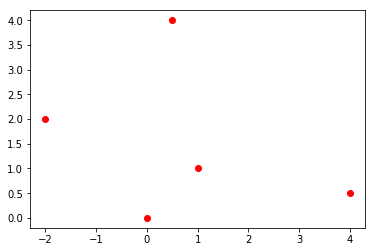

In [192]:
import matplotlib.pyplot as plt

points = [(0, 0), (1, 1), (0.5, 4), (4, 0.5), (-2, 2)] 
plt.plot([x[0] for x in points], [x[1] for x in points], 'ro')
plt.show()

Visually the points (0, 0) and (1, 1) appear to be closest. Just like in case of 1-D let us sort these points by x axis and then by y axis. Thus we get a couple of copies of the original array.

In [194]:
px = sorted(points, key = lambda x: x[0])
py = sorted(points, key = lambda x: x[1])
print('px:', px, 'py:', py)

('px:', [(-2, 2), (0, 0), (0.5, 4), (1, 1), (4, 0.5)], 'py:', [(0, 0), (4, 0.5), (1, 1), (-2, 2), (0.5, 4)])


From the above output, we see that the in px and py, the points sorted by x and y corrdinates, the closest pair of points (0, 0) and (1, 1) do not appear consecutively.

Our divide and conquer algorithm in 2-D space essetntally does the following

1. Define a function ClosestPair that accepts two inputs, $p_x$ and $p_y$, the points sorted by x and y coordinates respectively.
2. Define the following four arrays
- $l_x$: The Left half of $p_x$
- $r_x$: The Right half of $p_x$
- $l_y$: The Left half of $p_x$, sorted by their occurance in $p_y$
- $r_y$: The Right half of $p_x$, sorted by their occurance in $p_y$
3. Recursively call ClosestPair twice by passing $l_x, l_y$ and $r_x, r_y$ to find two pair of points $(l_1, l_2)$ and $(r_1,r_2)$, the closest points on the left and right half respectively.
4. We then implement a fuction to find the closes points split in left and right. This is the most challenging bit which we will see later. This function called ClosestSplitPair returns the pair of points closest to each other but split in left and right halves. We call these points $(s_1, s_2)$
5. Return the closest from these three pair of points $(l_1, l_2), (r_1, r_2), (s_1, s_2)$
Now assuming that we implement the function CloseseSplitPair (point 4 above) in linear time, we can implement this entire algorithm in $O(nlogn)$ time as the analysis is very similar to the analysis of Merge sort where we split the input in two and make two recursive calls. Then perform linear work outside the recursive calls.

Implementing ClosestSplitPair is not very straightforward and require us to make a subtle change. The relaxed criteria now is that this function can return garbage if the overall closest split pair is present entirely either on the left or right and needs to return the correct answer only if the overall closest pair is split. With this relaxed criteria we now have

$$\delta := min\{d(l_1, d_2), d(r_1, r_2)\}\\
(s_1, s_2) = ClosestSplitPair(P_x, P_y, \delta)\\
return \: best\: of\: (l_1, l_2),\:(r_1, r_2),\:(s_1, s_2)
$$

The modified ClosestSplitPair works as follows

1. Find the right most point in left half of the points sorted by x coordinates. This becomes the median point. We call this point $\bar{x}$ and since the points are already sorted by x coordinate, this operation is done in $O(1)$.
2. We then filter points $S_y := \{q_1, q_2\dots q_l\}$ which are all points by doing a linear scan of $P_y$ and with their x coordinates between $\bar{x} - \delta$ and $\bar{x} + \delta$. Thus give is a thick strip of width $2\delta$ around the median $\bar{x}$. This operation takes linear time.
3. Next, we iterate through these points in $S_y$ and look no further than 7 points (or the last point in the list $S_y$, whichever is minimum) to and compute distance between them in Brute force, on each iteration we compare te distance with the best we have and continue in the loop. The upper bound of this loop iterations is $7n \leq 7n$ and thus this is a linear time operation and the entire ClosestSplitPair is a linear time operation.

Few question still are open.
- Why does this algorithm work and guarantees to return an answer
- Where did we get this number 7 in the step 3 of the above algorithm. We will now see a proof for the correctness of this algorithm

***

Proof of correctness of ClosestSplitPair.

We start with the following Lemma

In the ClosestSplitPair, suppose (p, q) are the closest split pair with $d(p, q) < \delta$, then

- p and q will be included in the set $S_y$
- at most 6 points of $S_y$ have a y coordinate in between p and q, or in other words, p and q are not separated by more than 6 points between them in $S_y$

The following corollary this follows, if (p, q) is a split pair such that $d(p, q) < \delta$, then in the ClosestSplitPair algorithm, the points p and q, by above Lemma, are guaranteed to be present in $S_y$ and are no do not have more than 6 points separating them. Since the routine performs am exhaustive search and satisfies both these conditions, the ClosestSplitPair thus indeed find the correct points.

We will now prove the Lemma we stated earlier. We will prove the two claims one by one. The first one is simple of the two.

**p and q will be included in the set $S_y$**

*Proof:*

- $p = (x_1, y_1),\:q = (x_2, y_2)$ and $\delta $ is the minimum of the distance between points on the left of right. The value $\bar{x}$ is the median, or the right most x value of the left half.
- Since p and q are split with p in left half and q in right half we can conclude that $x_1 \leq \bar{x} < x_2$
- $\delta > d(p, q) = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2} \geq \sqrt{max\{|x_1 - x_1|, |y_1 - y_2| \}}$, thus we can say $|x_1 - x_2|, |y_1 - y_2| < \delta$
- Since $x_1 \leq \bar{x}$ and $x_2$ is no more than $\delta$ bigger than $x_1$, we can say $x_2 \leq \bar{x} + \delta$
- Similarly, $x_2 > \bar{x}$ and is no more than $\delta$ bigger than $x_2$, we can say $x_1 \geq \bar{x} - \delta$
- Thus $x_1 - \delta \leq \bar{x} \leq x_2 - \delta$, another way of thing about it as follows. Suppose two people are tied with a rope of length delta, then the maximum they can travel around $\bar{x}$ is, $\bar{x} - \delta$ and $\bar{x} + \delta$

**In the set $S_y$, there are no more than 6 points separating the true closest points, p and q**

*Proof:*

To prove this point let us draw 8 boxes, each box of size $\delta / 2$. 4 boxes will be stacked in a grid of $2\times 2$ on each side of the $\bar{x}$. The points p and q are split and are present on either side of $\bar{x}$. From above proof, we know that both these points are present in $S_y$ and their x coordinates are between $\bar{x} - \delta$ and $\bar{x} + \delta$. From above proof we know that both points p and q also satisfy the condition $|x_1 - x_2|, |y_1 - y_2| < \delta$

Suppose we draw the boxes such that the lower edge of the lower box passes through the point whose y coordinate is minimum of the two points p and q, then the points p and q will appear in one of the 4 boxes on either side of $\bar{x}$.

How many points can these 8 boxes hold? Let us assume that a box(each of size $\delta / 2 \times \delta/2$) can hold multiple points. The fartest these points can be placed is when they are kept on diagonally opposite corners of this box. By pythagoras theorem, the distance between these points is is $\sqrt{2}\cdot \delta / 2 = \delta / \sqrt{2}\: <\: \delta $. Since each box lies entirely on the left of right of $\bar{x}$, and $\delta$ is the minimum of the distance between a pair of points on left of right, we can say that no box, each of size $\delta / 2 \times \delta /2$ can contain more than 1 point in it. Since these two points p and q also exist in one of the 8 boxes, we cannot have more than these remaining 6 points between these two points p and q

Let us implement the FastPower function and analyse its time complexity and the finally implement the ClosestPair algorithm in python


In [211]:
def power_2rec(a, b):
    if b == 0:
        return 1
    if b == 1:
        return a
    l = power_2rec(a, b//2)
    r = power_2rec(a, b - b//2)
    return l*r


print('2^1 =',power_2rec(2, 1))
print('3^2 =',power_2rec(3, 2))
print('4^3 =',power_2rec(4, 3))
print('5^11 =',power_2rec(5, 11))
print('5^0 =',power_2rec(5, 0))
print('2^6 =',power_2rec(2, 6))

('2^1 =', 2)
('3^2 =', 9)
('4^3 =', 64)
('5^11 =', 48828125)
('5^0 =', 1)
('2^6 =', 64)


In [215]:
def fastpower(a, b):
    if b == 0:
        return 1
    if b == 1:
        return a
    else:
        res = fastpower(a * a, b // 2)
        return res if b % 2 == 0 else  res * a
       

print('2^1 =',fastpower(2, 1))
print('3^2 =',fastpower(3, 2))
print('4^3 =',fastpower(4, 3))
print('5^11 =',fastpower(5, 11))
print('2^6 =',fastpower(2, 6))
print('5^0 =',fastpower(5, 0))

('2^1 =', 2)
('3^2 =', 9)
('4^3 =', 64)
('5^11 =', 48828125)
('2^6 =', 64)
('5^0 =', 1)


On each recursive call of fastpower, the value of b halves. Thus the number of times fastpower is called is $log(b)$ times and thus the time complexity of the above function is $O(log(b))$. The log is technically of base 2 but since this is the Big-Oh notation thats not important. On the other hand the simple approach to multiply a b times will have the time complexity $O(b)$

In [313]:
def merge_sort(arr, axis = 0):  # axis = 0 for x-axis and 1 for y-axis
    n = len(arr)
    if n == 1:
        return arr

    if n >= 1:
        left_tree = merge_sort(arr[ : n/2], axis = axis)   
        right_tree = merge_sort(arr[n/2 : ], axis = axis)
        sorted_arr = [(None, None)] * n
        i = 0
        j = 0
        for k in range(n):
            if(i < len(left_tree) and j < len(right_tree)):
                if left_tree[i][axis] <= right_tree[j][axis]:
                    sorted_arr[k] = left_tree[i]
                    i+=1 
                elif left_tree[i][axis] > right_tree[j][axis]:
                    sorted_arr[k] = right_tree[j]
                    j+=1 
                
            elif i >= len(left_tree) and j < len(right_tree):
                sorted_arr[k] = right_tree[j]
                j += 1
            elif j >= len(right_tree) and i < len(left_tree):
                sorted_arr[k] = left_tree[i]
                i += 1

    return  sorted_arr   
    

def ClosestSplitPair(Px, Py, delta):
    x_bar = Px[len(Px)//2]
    Sy = []
    best = delta
    bestpair = None
    bestpairx = None
    for s in Py:
        if  (x_bar[0] - delta) <= s[0] <= (x_bar[0] + delta):
            Sy.append(s) 
    for i in range(0, len(Sy)-1):
        for j in range(1, min(7, len(Sy) - i)):
            dist_ps = ((Sy[i][0]-Sy[i+j][0])**2 + (Sy[i][1]-Sy[i+j][1])**2)**0.5  # Euclidean distance
            if dist_ps < delta:
                best = dist_ps
                bestpair = [Sy[i], Sy[i+j]]
                bestpairx = bestpair if bestpair[0][0] <= bestpair[1][0]  else [bestpair[1], bestpair[0]] 
                
    return bestpairx, bestpair
    
def ClosestPair(Px, Py):
    n = len(Px)
    if n == 1:
        return None
    if n == 2:
        return Px , Py
    if n == 3:
        dist_pxy1 = ((Px[0][0]-Px[1][0])**2 + (Py[0][1]-Py[1][1])**2)**0.5  # Euclidean distance
        dist_pxy2 = ((Px[1][0]-Px[2][0])**2 + (Py[1][1]-Py[2][1])**2)**0.5  # Euclidean distance
        dist_pxy3 = ((Px[0][0]-Px[2][0])**2 + (Py[0][1]-Py[2][1])**2)**0.5  # Euclidean distance
        if dist_pxy1 <= dist_pxy2 and dist_pxy1 <= dist_pxy3 :
            newPx = Px[0:2][:]
            return newPx, newPx if newPx[0][1] <= newPx[1][1]  else [newPx[1], newPx[0]]
        elif dist_pxy1 > dist_pxy2 and dist_pxy2 <= dist_pxy3 :
            newPx = Px[1:3][:]
            return newPx, newPx if newPx[0][1] <= newPx[1][1]  else [newPx[1], newPx[0]]
        else:
            newPx = [Px[0], Px[2]]
            return newPx, newPx if newPx[0][1] <= newPx[1][1]  else [newPx[1], newPx[0]]
    
    p1, p1y = ClosestPair(Px[:n//2], Py[:n//2])  # Qx, Qy
    p2, p2y = ClosestPair(Px[n//2:], Py[n//2:])  # Rx, Ry
    
    closepairx = None
    closepairy = None
    dist_p1 = ((p1[0][0]-p1[1][0])**2 + (p1[0][1]-p1[1][1])**2)**0.5  # Euclidean distance
    dist_p2 = ((p2[0][0]-p2[1][0])**2 + (p2[0][1]-p2[1][1])**2)**0.5  # Euclidean distance
    if dist_p1 <= dist_p2:
        delta = dist_p1
        closepairx = p1
        closepairy = p1y
    elif dist_p1 > dist_p2:
        delta = dist_p2
        closepairx = p2
        closepairy = p2y
    
    p3, p3y = ClosestSplitPair(Px, Py, delta)
        
    if p3 != None:
        dist_p3 = ((p3[0][0]-p3[1][0])**2 + (p3[0][1]-p3[1][1])**2)**0.5  # Euclidean distance
        closepairx = closepairx if dist_p3 > delta else p3
        closepairy = closepairy if dist_p3 > delta else p3y
        
    return closepairx, closepairy 
    
    
def ClosestPairAlgorithm(P):
    Px = merge_sort(P, 0)
    Py = merge_sort(P, 1)
    return ClosestPair(Px, Py)


print(ClosestPairAlgorithm( [(0, 0), (1, 1), (0.5, 4), (4, 0.5), (-2, 2)] )[0])

[(0, 0), (1, 1)]


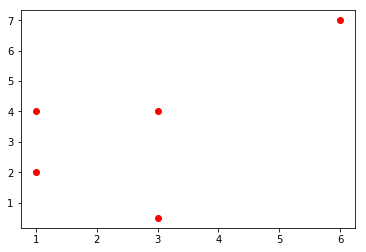

[(1, 2), (1, 4)]


In [314]:
import matplotlib.pyplot as plt

points = [(3, 4), (1, 2), (1, 4), (3, 0.5), (6, 7)] 
plt.plot([x[0] for x in points], [x[1] for x in points], 'ro')
plt.show()
print(ClosestPairAlgorithm( points )[0])

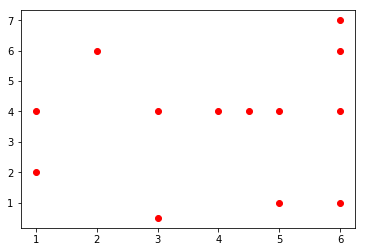

[(4, 4), (4.5, 4)]


In [310]:
import matplotlib.pyplot as plt

points = [(3, 4), (1, 2), (1, 4), (3, 0.5), (6, 7), (5, 4), (4, 4), (6, 4), (4.5, 4), (6, 6), (2, 6), (5, 1), (6, 1)] 
plt.plot([x[0] for x in points], [x[1] for x in points], 'ro')
plt.show()
print(ClosestPairAlgorithm( points )[0])
